# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regreción Lineal: Lección 9 - Intro Regresión Lineal**
---

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y evaluación
# ======================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Crossvalidation
# =================
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).  
El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:  
- Deberéis separar la X y la y.  
- Deberéis crear el train y el test.  
- Ajustar vuestro modelo.  

In [2]:
# cargamos el dataset
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
country,,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


### 1. Con todas las variables predictoras

In [3]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'region', 'restaurant_price_index'], axis = 1)
y = df["restaurant_price_index_normal"]

In [4]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# iniciamos la regresión lineal
lr = LinearRegression(n_jobs=-1)
# fiteamos el modelo
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [6]:
# usamos el método predict() para hacer las predicciones
y_predict_train = lr.predict(x_train) # predicciones para los datos de entrenamiento
y_predict_test = lr.predict(x_test) # predicciones para los datos de test

In [7]:
# creamos un dataframe para comparar los datos reales y los predichos de cada conjunto (train y test)
df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
# unimos todo en un dataframe
df_resultados = pd.concat([df_train,df_test], axis = 0)
df_resultados.head()

,Real,Predicted,Set
country,,,
Malaysia,3.232599,3.401407,Train
Indonesia,3.200753,3.320231,Train
Belarus,3.906126,3.563881,Train
Egypt,3.100294,2.970003,Train
Philippines,3.176574,3.140247,Train


In [8]:
# creamos una columna con los errores/residuos
df_resultados['residuos'] = df_resultados['Real'] - df_resultados['Predicted']
df_resultados.head()

,Real,Predicted,Set,residuos
country,,,,
Malaysia,3.232599,3.401407,Train,-0.168808
Indonesia,3.200753,3.320231,Train,-0.119478
Belarus,3.906126,3.563881,Train,0.342245
Egypt,3.100294,2.970003,Train,0.130290
Philippines,3.176574,3.140247,Train,0.036327


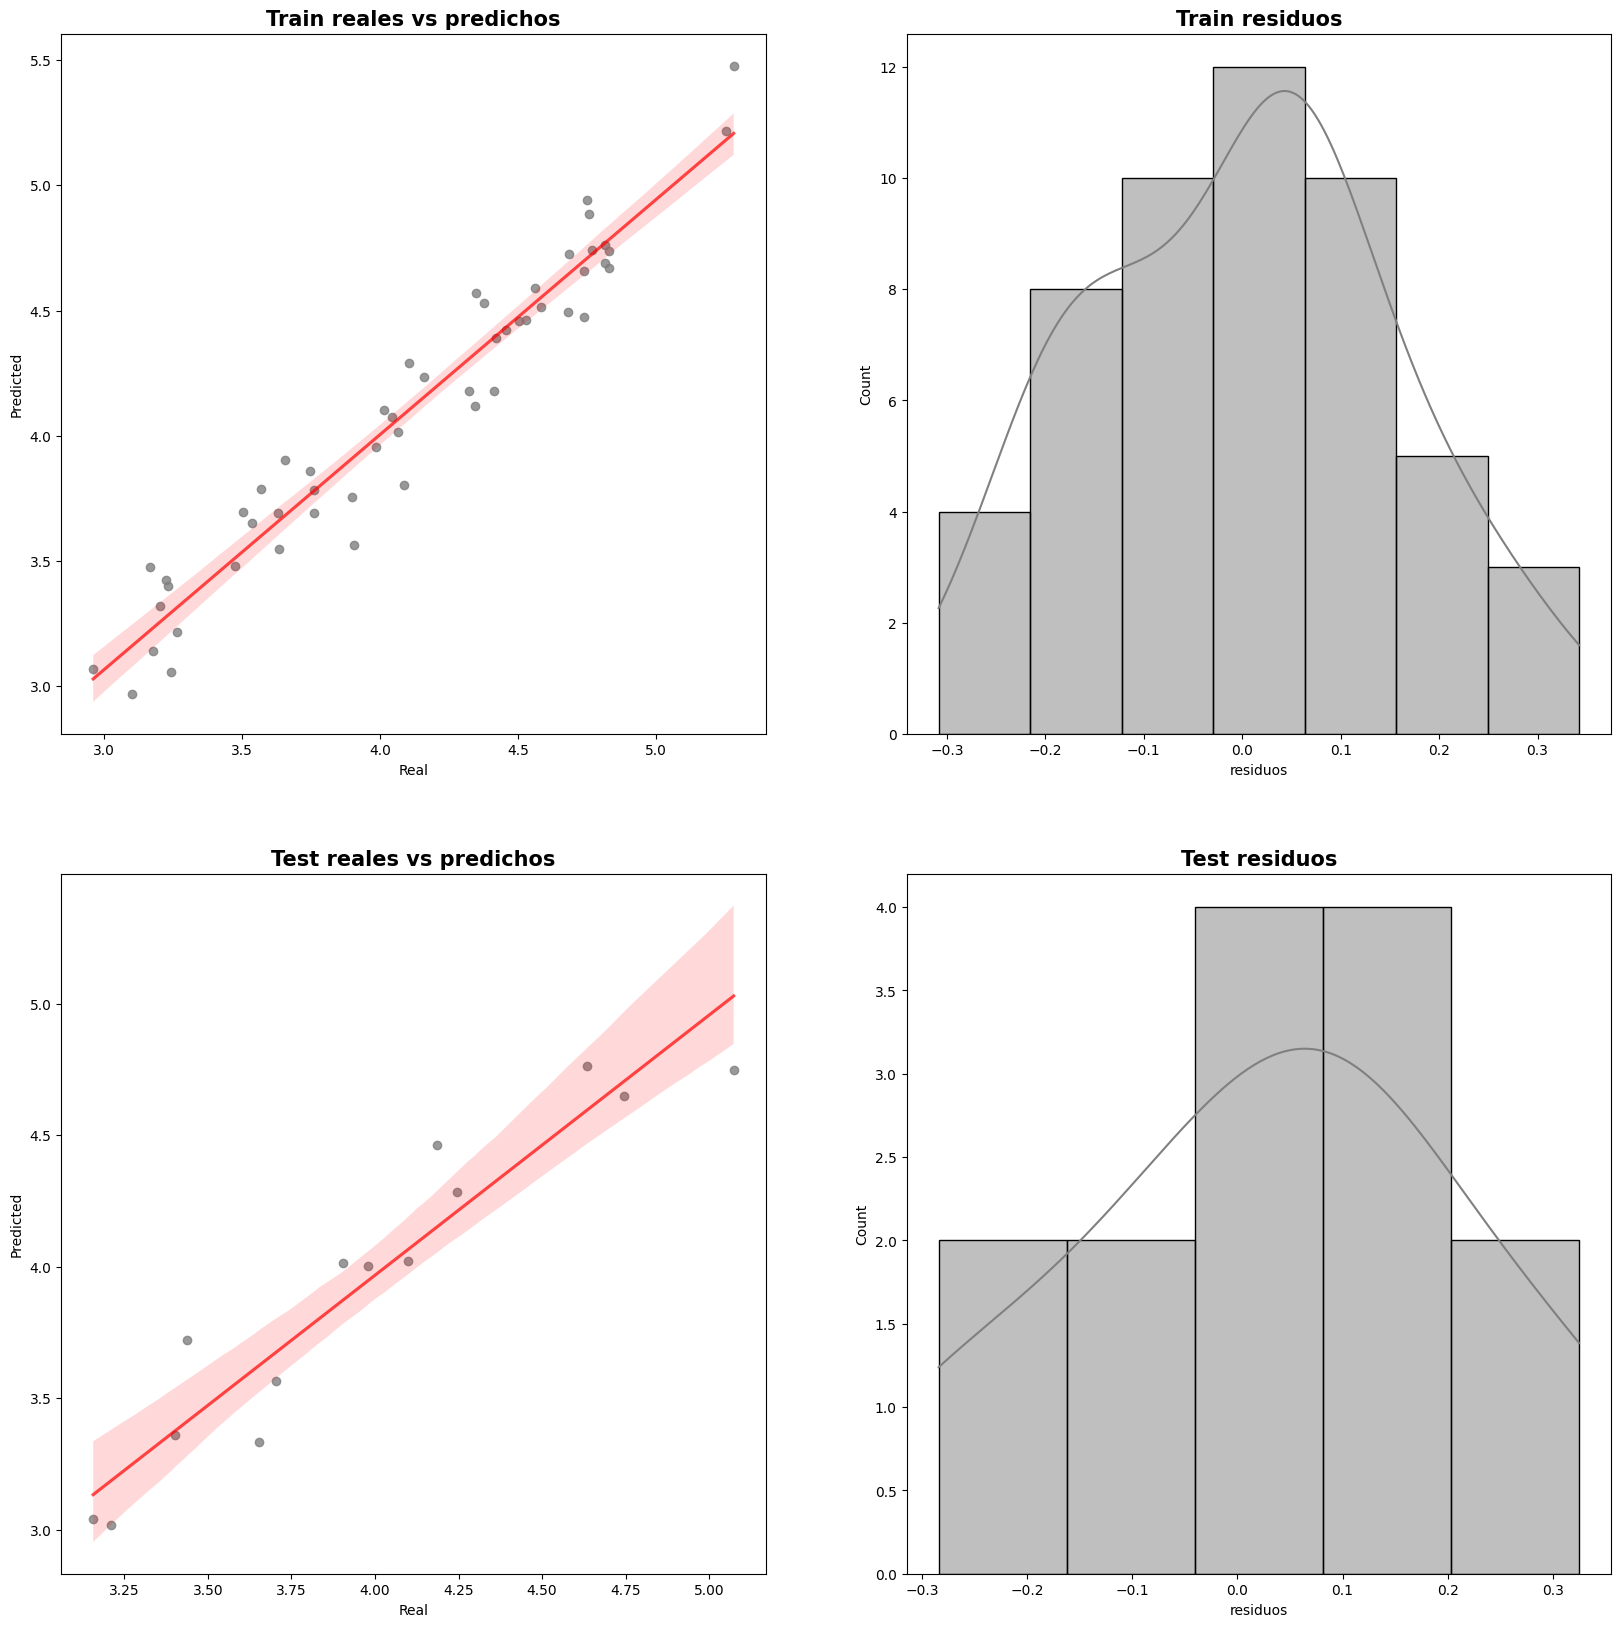

In [9]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = df_resultados[df_resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted",  
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 },
            ax = ax[0,0])

sns.regplot(data = df_resultados[df_resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(df_resultados[df_resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])

sns.histplot(df_resultados[df_resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [10]:
# Validación cruzada para R2 y RMSE
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X, # conjunto de datos de las predictoras completo (sin dividir en train/test)
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Convertimos el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.003078,0.001708,0.851160,-0.183016
1,0.005939,0.001699,0.616362,-0.236370
2,0.001829,0.001230,0.777638,-0.305009
3,0.001792,0.001396,0.929831,-0.167819
4,0.002529,0.001519,0.802703,-0.220470
5,0.003397,0.001938,0.968428,-0.141155
6,0.001732,0.001095,0.088599,-0.329730
7,0.001322,0.000894,0.808506,-0.133281
8,0.001254,0.001061,0.899438,-0.266069
9,0.001306,0.000896,0.878882,-0.227322


In [11]:
# calculamos la media para cada una de las métricas
print(f'la media para el R2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el R2 es 0.76
la media para el RMSE es 0.22


Conclusiones:

- El 76% de la variación de la VR se explica por las VPs (R2 = 0.76) y la media del RMSE es baja (0.22). Así que los datos sugieren que nuestro modelo de ML se ajusta lo sufuciente a los datos reales. 


- La mayoría de las iteraciones que hace el cross validation nos dá buenos resultados tanto de R2 como de RMSE, aunque los valores medios se ven modificados por la séptima iteración, lo que puede estar explicado por la presencia de outliers (aúnque se realizó su gestión con el método RobustScaler).

In [12]:
# guardamos los resultados y los cv_scores
df_resultados.to_csv("datos/soci_econ_country_profiles_resultados.csv")
cv_scores.to_csv("datos/soci_econ_country_profiles_cv_scores.csv")

### 2. Solo con las variables predictoras que según el ANOVA afectan a la variable respuesta 

In [13]:
df.filter(spv.col_anova)

,region_map,purchasing_power_index,cost_of_living,human_capital_index,inflation,urban_population
country,,,,,,
Argentina,4.043640,-0.243315,0.080347,-0.572700,0.374915,0.605509
Australia,4.752619,0.660990,0.893666,0.566766,-0.030665,0.393466
Austria,4.754992,0.530557,0.629026,0.507418,0.030085,-0.615413
Belarus,3.703008,-0.699621,-0.461962,-0.077916,1.839723,0.111590
Belgium,4.754992,0.434187,0.740210,0.293769,0.050562,0.830865
...,...,...,...,...,...,...
United Arab Emirates,4.435114,0.969002,0.526529,-0.287834,-0.022338,0.405946
United Kingdom,4.756654,0.555273,0.570250,0.436202,0.248350,0.293304
United States of America,4.596907,1.101926,0.741947,0.323442,0.052458,0.253943


In [14]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X_anova = df.filter(spv.col_anova)
y_anova = df["restaurant_price_index_normal"]

In [15]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_anova, y_anova, test_size = 0.2, random_state = 5)

In [16]:
# iniciamos la regresión lineal
lr_a = LinearRegression(n_jobs=-1)
# fiteamos el modelo
lr_a.fit(x_train_a, y_train_a)

LinearRegression(n_jobs=-1)

In [17]:
# usamos el método predict() para hacer las predicciones
y_predict_train_a = lr_a.predict(x_train_a) # predicciones para los datos de entrenamiento
y_predict_test_a = lr_a.predict(x_test_a) # predicciones para los datos de test

In [18]:
# creamos un dataframe para comparar los datos reales y los predichos de cada conjunto (train y test)
df_train_a = pd.DataFrame({'Real': y_train_a, 'Predicted': y_predict_train_a, 'Set': ['Train']*len(y_train_a)})
df_test_a = pd.DataFrame({'Real': y_test_a,  'Predicted': y_predict_test_a,  'Set': ['Test']*len(y_test_a)})
# unimos todo en un dataframe
df_resultados_a = pd.concat([df_train_a,df_test_a], axis = 0)
df_resultados_a.head()

,Real,Predicted,Set
country,,,
Jordan,4.375033,4.337588,Train
Saudi Arabia,3.654267,4.077423,Train
Sri Lanka,3.156519,3.109594,Train
Indonesia,3.200753,3.406132,Train
Sweden,4.767644,4.722743,Train


In [19]:
# creamos una columna con los errores/residuos
df_resultados_a['residuos'] = df_resultados_a['Real'] - df_resultados_a['Predicted']
df_resultados_a.head()

,Real,Predicted,Set,residuos
country,,,,
Jordan,4.375033,4.337588,Train,0.037445
Saudi Arabia,3.654267,4.077423,Train,-0.423156
Sri Lanka,3.156519,3.109594,Train,0.046925
Indonesia,3.200753,3.406132,Train,-0.205379
Sweden,4.767644,4.722743,Train,0.044901


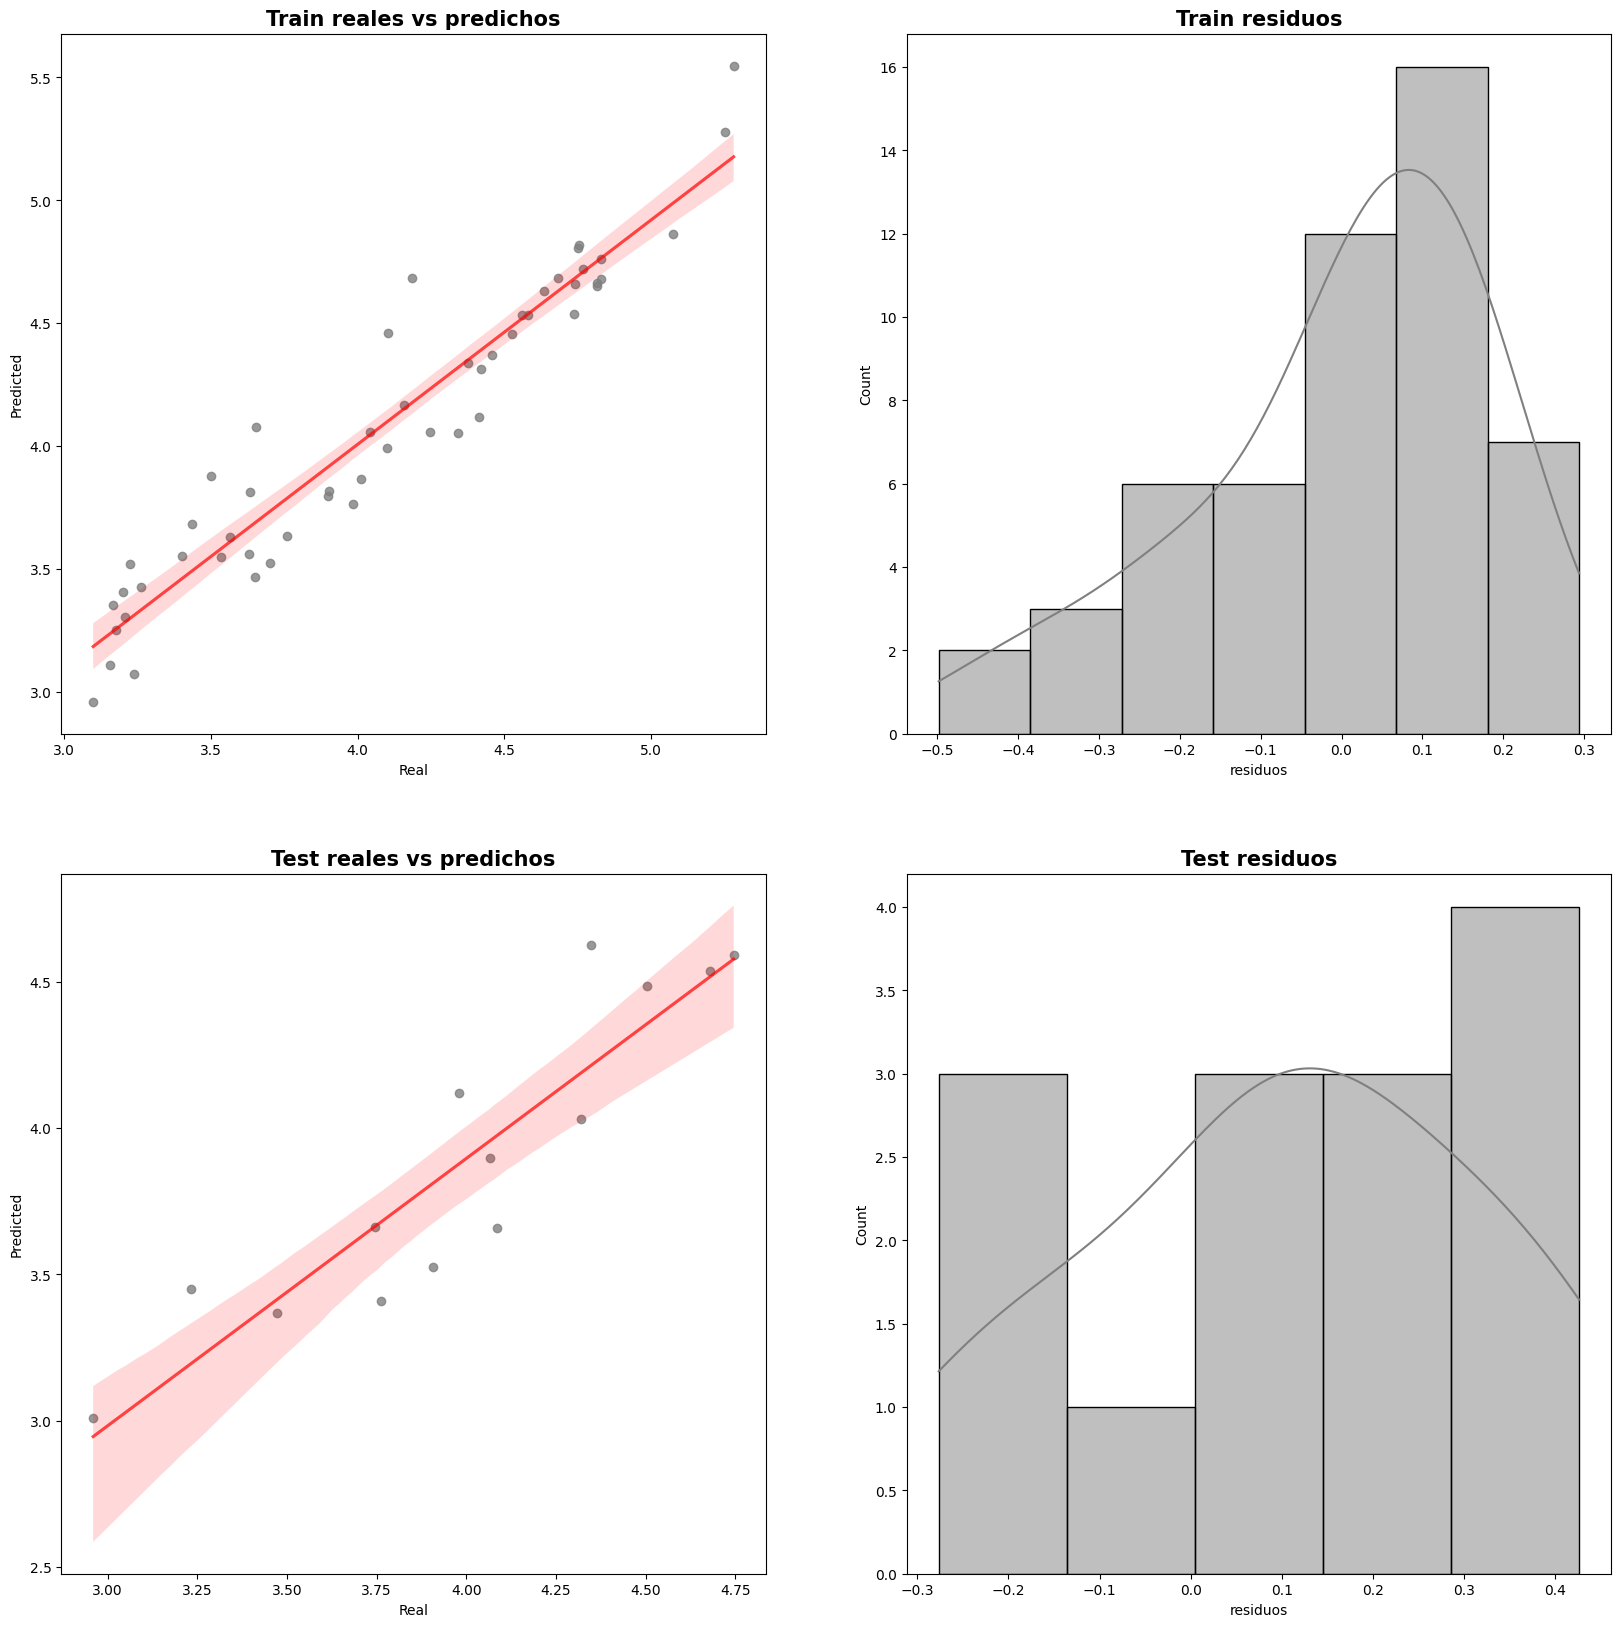

In [20]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = df_resultados_a[df_resultados_a['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 },
            ax = ax[0,0])

sns.regplot(data = df_resultados_a[df_resultados_a['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(df_resultados_a[df_resultados_a['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])

sns.histplot(df_resultados_a[df_resultados_a['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [21]:
# Validación cruzada para R2 y RMSE
cv_scores_a = cross_validate(
                    estimator = LinearRegression(),
                    X         = X_anova, # conjunto de datos de las predictoras completo (sin dividir en train/test)
                    y         = y_anova,
                    scoring   = ('r2', 'neg_root_mean_squared_error'),
                    cv        = 10)

# Convertimos el diccionario a dataframe para facilitar la visualización
cv_scores_a = pd.DataFrame(cv_scores_a)
cv_scores_a

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.003227,0.001892,0.881606,-0.163227
1,0.002782,0.002225,0.737136,-0.195658
2,0.003264,0.003090,0.922602,-0.179948
3,0.002316,0.001545,0.908820,-0.191301
4,0.002191,0.001338,0.699889,-0.271913
5,0.002699,0.004229,0.980302,-0.111495
6,0.002206,0.001150,0.007674,-0.344058
7,0.002301,0.001935,0.616984,-0.188495
8,0.002593,0.002502,0.893979,-0.273196
9,0.003379,0.002544,0.943575,-0.155158


In [22]:
# calculamos la media para cada una de las métricas
print(f'la media para el R2 es {cv_scores_a["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores_a["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el R2 es 0.76
la media para el RMSE es 0.21


Conclusiones:

- El 76% de la variación de la VR se explica por las VPs (R2 = 0.76) y la media del RMSE es baja (0.21). Así que los datos sugieren que nuestro modelo de ML se ajusta lo sufuciente a los datos reales. 


- La mayoría de las iteraciones que hace el cross validation nos dá buenos resultados tanto de R2 como de RMSE, aunque los valores medios se ven modificados por la séptima iteración, lo que puede estar explicado por la presencia de outliers (aúnque se realizó su gestión con el método RobustScaler). 

- En general los resultados son similares a los de la regresión lineal utilizando todas las variables predictoras. Tan solo varía mínimamente el RSME (0,01 más bajo si utilizamos solo las variables relevantes de acuerdo al ANOVA). Además, en este último caso, aparte del valor llamativo de la séptima iteración hay otras dos iteraciones (quinta y octava) que están por debajo de límite de 0,70 para R2, pero los valores de las demás iteraciones son tan altos que se compensan y la media de R2 es la misma que utilizando todas las variables predictoras.

In [23]:
# guardamos los resultados y los cv_scores del modelo con solo las variables que influyen de acuerdo al ANOVA
df_resultados_a.to_csv("datos/soci_econ_country_profiles_resultados_anova.csv")
cv_scores_a.to_csv("datos/soci_econ_country_profiles_cv_scores_anova.csv")